<a href="https://colab.research.google.com/github/paulommaia/Python_Workshop_Symbio2023/blob/main/04_Working_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

Pandas is a Python package that is very used for data analysis. It allows you to open .csv files and to create tabular-like data in what is called a Pandas dataframe.

In [1]:
# We begin by importing both pandas and numpy

import numpy as np
import pandas as pd

##Load data

We're going to work with the Titanic dataset which has data on the people who embarked the RMS Titanic in 1912 and whether they survived the expedition or not

In [2]:
# Read from CSV to Pandas DataFrame
url = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/titanic.csv"
df = pd.read_csv(url, header=0)

In [3]:
# df.head lets you explore the first three rows of the dataset

df.head(3)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0


In [4]:
# df.tail... you can guess!

df.tail(3)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
1306,3,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.225,NaN,C,0
1308,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.875,NaN,S,0


These are the different features:

* class: class of travel
* name: full name of the passenger
* sex: gender
* age: numerical age
* sibsp: # of siblings/spouse aboard
* parch: number of parents/child aboard
* ticket: ticket number
* fare: cost of the ticket
* cabin: location of room
* embarked: port that the passenger embarked at
* survived: survival metric (0 - died, 1 - survived)

In [5]:
# We can use .describe() to extract some standard details about our numerical features.

df.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


<AxesSubplot:>

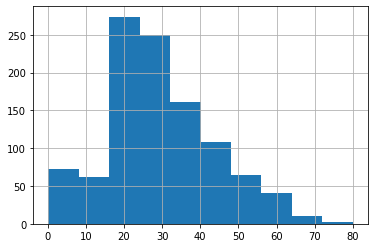

In [6]:
# Histograms
df["age"].hist()

In [7]:
# Unique values
df["embarked"].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

## Filtering pandas dataframes

In [8]:
# Filtering
df[df["sex"]=="female"].head() # only the female data appear

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,0
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,1


In [9]:
# Filtering
df[
    (df["sex"]=="female") & (df['age'] > 30)
].head() # only the female data appear

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,1
17,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,1
18,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,1
21,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,1


In [10]:
# We can also sort our features in ascending or descending order.

df.sort_values("age", ascending=False).head()


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
14,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1
61,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,1
1235,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0
135,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0


We can also get statistics across our features for certain groups. Here we want to see the average of our continuous features based on whether the passenger survived or not.

In [11]:
survived_group = df.groupby("survived").mean()

In [12]:
survived_group

,pclass,age,sibsp,parch,fare
survived,,,,,
0,2.500618,30.545369,0.521632,0.328801,23.353831
1,1.962000,28.918228,0.462000,0.476000,49.361184


In [14]:
# if we want to see a single characteristic:
df.groupby("survived")['age'].mean()

survived
0    30.545369
1    28.918228
Name: age, dtype: float64

Row / column selection

In [15]:
# We can use iloc to get rows or columns at particular positions in the dataframe.

df.iloc[0]

pclass                                  1
name        Allen, Miss. Elisabeth Walton
sex                                female
age                                  29.0
sibsp                                   0
parch                                   0
ticket                              24160
fare                             211.3375
cabin                                  B5
embarked                                S
survived                                1
Name: 0, dtype: object

In [16]:
df.iloc[0:5]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


We can also apply "masks" - boolean operators to filter columns

In [19]:
mask = (df['sex'] == 'female')

df.loc[mask]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,0
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,1
...,...,...,...,...,...,...,...,...,...,...,...
1286,3,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,1
1290,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
1300,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,1
1304,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,0


Or written in another way:

In [21]:
df.query("sex == 'female'")

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,0
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,1
...,...,...,...,...,...,...,...,...,...,...,...
1286,3,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,1
1290,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
1300,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,1
1304,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,0


In [17]:
# And to get a specific list of columns:

df[['name', 'sex', 'age']]

,name,sex,age
0,"Allen, Miss. Elisabeth Walton",female,29.0000
1,"Allison, Master. Hudson Trevor",male,0.9167
2,"Allison, Miss. Helen Loraine",female,2.0000
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000
...,...,...,...
1304,"Zabour, Miss. Hileni",female,14.5000
1305,"Zabour, Miss. Thamine",female,NaN
1306,"Zakarian, Mr. Mapriededer",male,26.5000
1307,"Zakarian, Mr. Ortin",male,27.0000


## Looping through pandas dataframes

In [26]:
for i, row in df.iterrows():
    print(row)
    print('\n')
    print(row['name'])
    break

pclass                                  1
name        Allen, Miss. Elisabeth Walton
sex                                female
age                                  29.0
sibsp                                   0
parch                                   0
fare                             211.3375
embarked                                S
survived                                1
Name: 0, dtype: object


Allen, Miss. Elisabeth Walton


In [30]:
# Looping through dataframes is not recommended - applying "vector" operations is the best

df['is_age_over_30'] = (df['age'] > 30)

Other alternative using an "apply function", which is a function you can run without defining a name (called anonymous function)

In [29]:
df['is_age_over_30'] = df['age'].apply(lambda x: x >= 30)

And we can also define it:

In [32]:
def is_over_30(value):
    return value >= 30

df['age'].apply(is_over_30)

0       False
1       False
2       False
3        True
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

# Exercises

## Exercise 1

Search the internet on how to drop columns in Pandas. Drop the columns "ticket" and "cabin". 

In [23]:
# Dropping multiple columns
df = df.drop(["cabin", "ticket"], axis=1)
df.head()

,pclass,name,sex,age,sibsp,parch,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,0


## Exercise 2

Count:
- How many users with fare above 150 survived? 
- What is the percentage of total users with fare above 150 who survived?
- Hardest: How many users have a name starting with the letter A?

In [27]:
df[df['fare'] > 150]['survived'].sum()

34

In [28]:
df[df['fare'] > 150]['survived'].mean()

0.6666666666666666

In [33]:
df['name'].apply(lambda x: x[0] == 'A')

0        True
1        True
2        True
3        True
4        True
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: name, Length: 1309, dtype: bool

## References

- https://madewithml.com/courses/foundations/pandas/